In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
data=pd.read_csv('mnist_train.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
data=np.array(data)
data

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [3]:
m,n=data.shape
np.random.shuffle(data)
data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev = X_dev / 255.
data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
Y_train

array([0, 9, 4, ..., 5, 2, 1], dtype=int64)

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ",get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [8]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[5 5 4 ... 5 4 4] [0 9 4 ... 5 2 1]
Accuracy:  0.11808474576271187
Iteration:  10
[0 9 2 ... 5 2 8] [0 9 4 ... 5 2 1]
Accuracy:  0.1761864406779661
Iteration:  20
[0 9 6 ... 5 2 8] [0 9 4 ... 5 2 1]
Accuracy:  0.22584745762711864
Iteration:  30
[0 9 6 ... 5 2 5] [0 9 4 ... 5 2 1]
Accuracy:  0.29559322033898305
Iteration:  40
[0 7 6 ... 5 2 7] [0 9 4 ... 5 2 1]
Accuracy:  0.38264406779661014
Iteration:  50
[0 7 6 ... 5 2 7] [0 9 4 ... 5 2 1]
Accuracy:  0.4403728813559322
Iteration:  60
[0 7 6 ... 5 2 1] [0 9 4 ... 5 2 1]
Accuracy:  0.48938983050847457
Iteration:  70
[0 7 6 ... 5 2 1] [0 9 4 ... 5 2 1]
Accuracy:  0.5320508474576271
Iteration:  80
[0 7 6 ... 5 2 1] [0 9 4 ... 5 2 1]
Accuracy:  0.5694745762711865
Iteration:  90
[0 7 6 ... 5 2 1] [0 9 4 ... 5 2 1]
Accuracy:  0.600457627118644
Iteration:  100
[0 7 6 ... 5 2 1] [0 9 4 ... 5 2 1]
Accuracy:  0.6286779661016949
Iteration:  110
[0 7 6 ... 5 2 1] [0 9 4 ... 5 2 1]
Accuracy:  0.6528474576271186
Iteration:  120
[0 9 6 

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


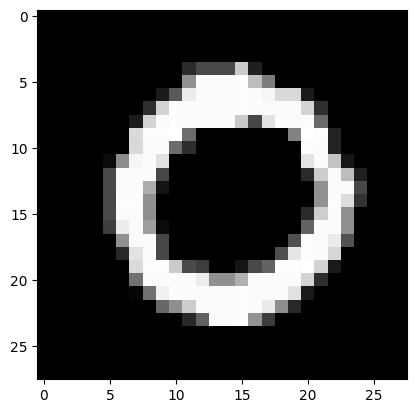

Prediction:  [9]
Label:  9


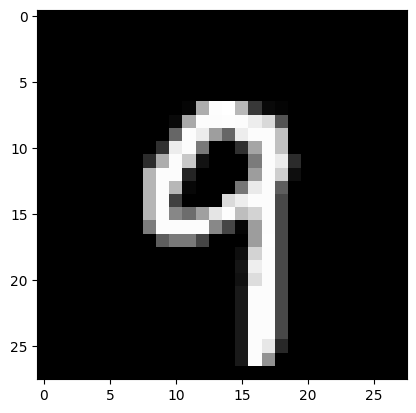

Prediction:  [6]
Label:  4


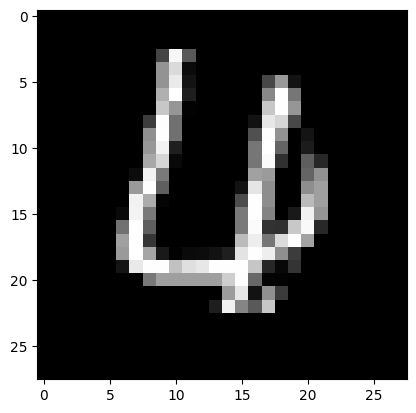

Prediction:  [1]
Label:  1


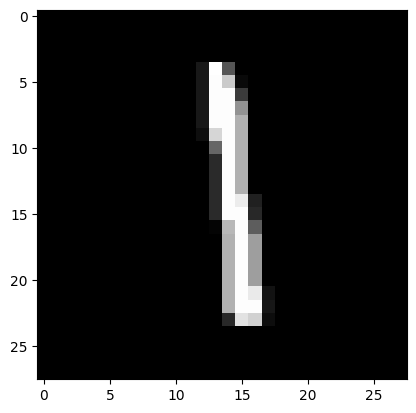

In [10]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [11]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 6 9 2 0 8 1 4 3 8 3 2 7 6 1 4 2 4 0 7 0 4 8 0 8 4 4 8 9 5 6 6 3 1 1 4 3
 3 1 5 9 6 2 1 1 0 8 1 0 9 6 6 1 8 1 6 0 9 0 7 5 7 5 7 9 0 8 2 2 0 9 0 9 8
 6 4 2 0 9 5 1 6 8 8 0 3 5 7 3 4 9 7 9 2 0 9 6 9 1 3 7 1 4 1 3 7 4 4 1 0 9
 8 6 2 1 9 1 7 6 6 1 7 3 6 8 6 2 1 4 3 6 1 4 0 8 6 1 6 2 9 7 1 0 5 4 9 8 6
 8 9 4 6 9 4 9 7 5 6 6 8 2 3 4 8 4 2 1 2 4 2 7 5 2 8 0 1 1 4 7 9 6 6 9 8 9
 7 0 1 1 3 3 2 2 8 4 1 0 5 6 5 7 0 3 1 4 3 5 6 7 7 2 9 2 1 3 1 0 1 6 4 4 8
 4 5 6 5 2 2 2 0 3 9 6 6 6 7 0 4 2 0 3 2 0 8 3 2 5 7 5 5 8 4 9 5 7 0 7 5 0
 9 4 2 4 6 1 8 6 3 0 2 5 7 5 5 4 3 6 6 1 7 2 1 6 8 9 5 4 3 9 4 7 0 8 4 3 9
 3 6 6 3 1 2 0 6 3 6 3 1 3 2 5 4 7 6 4 7 6 0 8 5 5 9 8 0 1 3 8 4 7 2 1 8 1
 7 9 2 4 6 1 7 2 2 4 5 4 3 8 5 7 2 4 3 0 7 3 1 4 6 0 8 6 0 5 9 6 3 4 4 8 8
 4 8 9 5 7 3 8 0 5 5 9 5 5 5 0 8 3 5 0 5 4 2 4 8 2 0 1 8 3 7 1 8 1 3 6 2 2
 2 6 2 2 3 2 7 4 0 0 9 6 3 8 5 6 2 1 0 9 8 2 4 5 2 5 2 1 6 0 4 6 0 9 7 4 0
 1 6 8 7 7 2 5 5 4 7 3 3 6 8 8 2 1 9 5 5 9 4 3 2 6 1 1 1 2 3 3 8 6 5 6 3 7
 8 3 4 9 6 0 3 1 0 8 4 6 

0.845